This notebook shows how to use LLM-Geo, you can uncomment a study case (preferred Case 1 and Case 3) to get the spatial analysis results without any human intervention. 

Please check the [webpage of LLM-Geo](https://github.com/gladcolor/LLM-Geo) for more detail!


#  Install package

In [1]:
# ! pip install pyvis
# ! pip install networkx

# Import package

In [3]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

ImportError: cannot import name 'OpenAi' from 'openai' (c:\Users\jevigne\AppData\Local\miniconda3\envs\LLM-geo\Lib\site-packages\openai\__init__.py)

# Define Solution class
Please run the following cell to define the functions

In [5]:
import LLM_Geo_Constants as constants
import helper

from LLM_Geo_kernel import Solution

%load_ext autoreload
%autoreload 2

c:\NOODB\GIS-research\LLM-Geo\LLM_Geo_Constants.py:42: SyntaxWarning: invalid escape sequence '\T'
  'The node attributes include: 1) node_type (data or operation), 2) data_path (data node only, set to "" if not given ), and description. E.g., {‘name’: “County boundary”, “data_type”: “data”, “data_path”: “D:\Test\county.shp”,  “description”: “County boundary for the study area”}.',


# Demonstration Cases

## Input task and data desciption

In [6]:
isReview = True

In [7]:

# Case 1: population living near hazardous wastes

# task_name ='Resident_at_risk_counting'
# TASK = r"""1) Find out Census tracts that contain hazardous waste facilities, then comppute and print out the population living in those tracts. The study area is North Carolina (NC), US.
# 2) Generate a population choropleth map for all tract polygons in NC, rendering the color by tract population; and then highlight the borders of tracts that have hazardous waste facilities. Please draw all polygons, not only the highlighted ones. The map size is 15*10 inches.
# """

# DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/HW_Sites_EPSG4326.zip.",
#                   "NC tract boundary shapefile: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_37_EPSG4326.zip. The tract ID column is 'GEOID', data types is integer.",
#                   "NC tract population CSV file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID', data types is integer."
#                  ]
 
# # Case 2: France_mobility_changes_2020
# task_name ='France_mobility_changes_2020'
# TASK = r'''
# 1) Show the 2020 human mobility monthly change rates of each administrative regions in a France choropleth map. Each month is a sub-map in a map matrix，12 months in total. All monthly maps need to use the same colorbar range (color scheme: coolwarm). The base of the change rate is January 2020. 
# 2) Draw a line chart to show the monthly change rate trends of all administrative regeions. Each region is a line (the region name is the legend), the x-axis is 2020 months.
# '''

# DATA_LOCATIONS = ["ESRI shapefile for France administrative regions:" + \
#                   "https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip. " + \
#                   "The 'GID_1' column is the administrative region code, 'NAME_1' column is the administrative region name.",
#                   "REST API url with parameters for daily human mobility data access:" + \
#                   "http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020." + \
#                   "The response is in CSV format. There are three columns in the response: " + \
#                   "place,date (format:2020-01-07), and intra_movement. 'place' column is the administractive region code of every country;" + \
#                   "codes for France administrative regions start with 'FRA'. Use the total intra_movement of the month as the montly mobility.",
#                  ]

## Case 3: COVID-19 death rate in US
task_name ='COVID_death_rate'
TASK = r'''1) Draw a choropleth map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red. Set figure size to 15*10 inches.  
'''


DATA_LOCATIONS = [
                  r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
                  r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'; map projection is EPSG:4269",
                  r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
                 ]



# # Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'
# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map of zipcode area polygons (unit: km), also show the hospital.
# '''

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


## Case 5: Census API
# task_name ='Census_API'
# TASK = r''' Show the spatial distribution of the county level median income in the contigous US. Set figure size to (25,15)
# '''

# DATA_LOCATIONS = [
#       "You can use the Census API.",
# ]

# DATA_LOCATIONS = [
# '''Census API key: ae7be70727932dd6aed257692de3f344365d0678'''              
# ]



save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
model=r"gpt-4"
# model = r'gpt-4-1106-preview'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional Geo-information scientist and programmer good at Python. You have worked on Geographic information science more than 20 years, and know every detail and pitfall when processing spatial data and coding. You know well how to set up workflows for spatial analysis tasks. You have significant experence on graph theory, application, and implementation. You are also experienced on generating map using Matplotlib and GeoPandas.
 

Your task: Generate a graph (data structure) only, whose nodes are (1) a series of consecutive steps and (2) data to solve this question:  
 1) Draw a choropleth map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
2) Draw a scatter plot to show the correlation and trend line of the death

## Get graph code from GPT API

In [8]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

Error in get_LLM_reply(), will sleep 10 seconds, then retry 1/3: 
 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error in get_LLM_reply(), will sleep 10 seconds, then retry 2/3: 
 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is avail

UnboundLocalError: cannot access local variable 'response' where it is not associated with a value

## Execute code to generate the solution graph

In [31]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

F:\Research\LLM-Geo\COVID_death_rate.html


## Generate prompts and code for operations (functions)

In [32]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import pandas as pd

def load_covid_data(covid_data_url='https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv'):
    # Description: This function loads the COVID-19 data
    # Parameters: covid_data_url: the URL of the CSV file containing the COVID-19 data
    # Return: covid_df: the DataFrame with the loaded COVID-19 data

    # Load the data into a Pandas DataFrame
    covid_df = pd.read_csv(covid_data_url)

    # Check types of the columns and convert if needed
    if covid_df['fips'].dtype == float:
        # Convert fips column to integer then to string type
        covid_df['fips'] = covid_df['fips'].fillna(0).astype(int).astype(str).str.zfill(5)
    elif covid_df['fips'].dtype != str:
        # Convert fips column to string type
        covid_df['fips'] = covid_df['fips'].astype(str).str.zfill(5)

    # Filter the data to include only records for 2020.12.31
    covid_df = covid_df[covid_df.date == '2020-12-31']

    # Keep only needed columns and drop records with NaN
    covid_df = covid_df[['fips', 'cases', 'deaths']].dropna(subset=['fips', 'cases', 'deaths'])

    return covid_df
import geopandas as gpd

def load_county_shp(county_shp_url='https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip'):
    """
    Description: Load the Contiguous US county shapefile from a given URL.
    The function will return a GeoDataFrame of county boundaries. 

    Arguments:
    county_shp_url : str : URL of the shapefile
    
    Returns:
    county_gdf : GeoDataFrame : GeoDataFrame of the Contiguous US county boundaries
    """
    county_gdf = gpd.read_file(county_shp_url)
    return county_gdf
import pandas as pd

def load_acs_data(acs_data_url='https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv'):
    # Description: Load ACS2020 Census data
    # acs_data_url: URL of the ACS2020 Census data

    # Load the CSV file
    acs_df = pd.read_csv(acs_data_url, usecols=['FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 
                                                'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'])

    # Convert FIPS to str with leading zeros
    acs_df['FIPS'] = acs_df['FIPS'].apply(lambda x: '{0:0>5}'.format(x))

    # Remove records with NaN cells
    acs_df.dropna(subset=['FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 
                          'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'], inplace=True)
    
    return acs_df
def calculate_death_rates(covid_df):
    # Description: This function calculates the COVID-19 death rate for each county
    # Parameters: covid_df: the DataFrame with the cleaned COVID-19 data
    # Return: death_rate_df: the DataFrame with the calculated death rates for each county

    # Ensure that data types are correct for computation
    covid_df['cases'] = pd.to_numeric(covid_df['cases'])
    covid_df['deaths'] = pd.to_numeric(covid_df['deaths'])
    
    # Calculate the death rate and add it as a new column to the DataFrame 
    covid_df['death_rate'] = covid_df['deaths'] / covid_df['cases']
    
    # Create a new DataFrame with only the fips and death_rate columns
    death_rate_df = covid_df[['fips', 'death_rate']]

    return death_rate_df
def calculate_senior_resident_rate(acs_df):
    # Description: Calculate senior resident rate for each county
    # acs_df: DataFrame of ACS2020 Census data

    # Calculate the total seniors
    acs_df['Senior_Total'] = acs_df['Total Population: 65 to 74 Years'] + acs_df['Total Population: 75 to 84 Years'] + acs_df['Total Population: 85 Years and Over']
    
    # Calculate the senior rate
    acs_df['Senior_Rate'] = acs_df['Senior_Total'] / acs_df['Total Population']
    
    # Keep only necessary columns
    senior_rate_df = acs_df[['FIPS', 'Senior_Rate']].copy()
    
    return senior_rate_df
def join_data_to_county(county_gdf, death_rate_df, senior_rate_df):
    #

## Generate prompts and code for assembly program

In [33]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

def load_covid_data(covid_data_url='https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv'):
    covid_df = pd.read_csv(covid_data_url)
    if covid_df.empty:  # Add validation to check if data is loaded correctly
        raise ValueError("No data loaded from the url for covid data.")
    if covid_df['fips'].dtype == float:
        covid_df['fips'] = covid_df['fips'].fillna(0).astype(int).astype(str).str.zfill(5)
    elif covid_df['fips'].dtype != str:
        covid_df['fips'] = covid_df['fips'].astype(str).str.zfill(5)
    covid_df = covid_df[covid_df.date == '2020-12-31']
    covid_df = covid_df[['fips', 'cases', 'deaths']].dropna(subset=['fips', 'cases', 'deaths'])
    return covid_df


def draw_choropleth_map(county_gdf_with_data):  
    plt.figure(figsize=(15, 10))
    county_gdf_with_data = county_gdf_with_data.to_crs("EPSG:5070")
    county_gdf_with_data.plot(column='death_rate', cmap='YlOrRd', linewidth=0.8, scheme='quantiles', k=5)
    plt.title('COVID-19 Death Rate by County')  
    plt.colorbar(label='Death Rate')  # Add color bar
    plt.title('COVID-19 Death Rate (%) by County')  # Specify the unit in the title
    plt.axis(aspect='equal')  # Set aspect of the map
    choropleth_map = plt.gcf()
    choropleth_map.savefig("choropleth_map.png", dpi=300)
    return choropleth_map


def draw_scatter_plot(county_gdf_with_data):    
    county_gdf_with_data['Senior_Rate'] = pd.to_numeric(county_gdf_with_data['Senior_Rate'])
    county_gdf_with_data['death_rate'] = pd.to_numeric(county_gdf_with_data['death_rate'])
    plt.figure(figsize=(15,10))
    sns.regplot(x='Senior_Rate', y='death_rate', data=county_gdf_with_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    slope, intercept, r_value, _, _ = stats.linregress(county_gdf_with_data['Senior_Rate'], county_gdf_with_data['death_rate'])
    
    plt.xlabel('Senior Resident Rate (%)')  # Specify the units in axes labels
    plt.ylabel('Death Rate (%)')
    plt.text(0.05, 0.95, f'R-sqaured = {r_value**2:.2f}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.05, 0.90, f'p-value = {intercept:.2f}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Scatter Plot of Senior Resident Rate (%) vs Death Rate (%)', fontsize=15)
    
    scatter_plot = plt.gcf()
    plt.show()
    return scatter_plot 


def assembly_solution():
    covid_df = load_covid_data()
    county_gdf = load_county_shp()
    acs_df = load_acs_data()
    if acs_df is None or acs_df.empty:  # If acs_df is empty or none then stop the execution
        raise ValueError("ACS Data load returned None object or empty dataframe.")
    death_rate_df = calculate_death_rates(covid_df)
    senior_rate_df = calculate_senior_resident_rate(acs_df)
    county_gdf_with_data = join_data_to_county(county_gdf, death_rate_df, senior_rate_df)
    choropleth_map = draw_choropleth_map(county_gdf_with_data)
    scatter_plot = draw_scatter_plot(county_gdf_with_data)
    return choropleth_map, scatter_plot 


assembly_solution()

## Execute assembly code



-------------- Running code (trial # 1/10) --------------




Complete program:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #     print("Geting LLM reply... \n")


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 238, in <module>
    assembly_solution()
  File "Complete program", line 233, in assembly_solution
    choropleth_map = draw_choropleth_map(county_gdf_with_data)
  File "Complete program", line 198, in draw_choropleth_map
    plt.colorbar(label='Death Rate')  # Add color bar
  File "d:\ProgramData\anaconda3\envs\llm_geo\Lib\site-packages\matplotlib\pyplot.py", line 2322, in colorbar
    raise RuntimeError('No mappable was found to use for colorbar '
RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

Sending error information to LLM for debugging...
The provided script seems to have significant problems in considering and reasoning about the use of the color bar in the 'draw_choropleth_map' method. A color bar is typically applied with a mappable object like images, contour sets, and such raster data,

Complete program:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.sink_nodes = None


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 85, in <module>
    assembly_solution()
  File "Complete program", line 81, in assembly_solution
    choropleth_map = draw_choropleth_map(county_gdf_with_data)
  File "Complete program", line 54, in draw_choropleth_map
    plt.axis(aspect='equal')  # set aspect of the map
  File "d:\ProgramData\anaconda3\envs\llm_geo\Lib\site-packages\matplotlib\pyplot.py", line 2701, in axis
    return gca().axis(arg, emit=emit, **kwargs)
  File "d:\ProgramData\anaconda3\envs\llm_geo\Lib\site-packages\matplotlib\axes\_base.py", line 2133, in axis
    raise _api.kwarg_error("axis", kwargs)
TypeError: axis() got an unexpected keyword argument 'aspect'

Sending error information to LLM for debugging...
The error occurred in `draw_choropleth_map(county_gdf_with_data)` function. The function plt.axis() is incorrectly being passed with an unexpected keyword, 'aspect'. It's clear this line of code is meant to ensure the x and

Complete program:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.sink_nodes = None


<Figure size 1080x720 with 0 Axes>

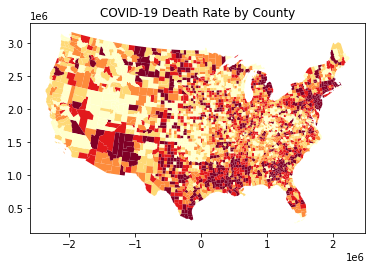

<Figure size 1080x720 with 0 Axes>

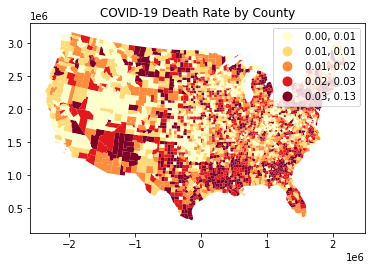

<Figure size 1080x720 with 0 Axes>

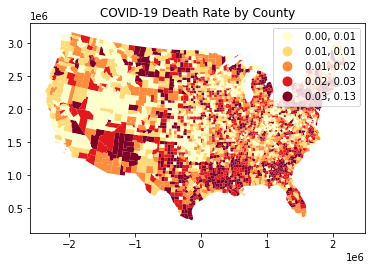

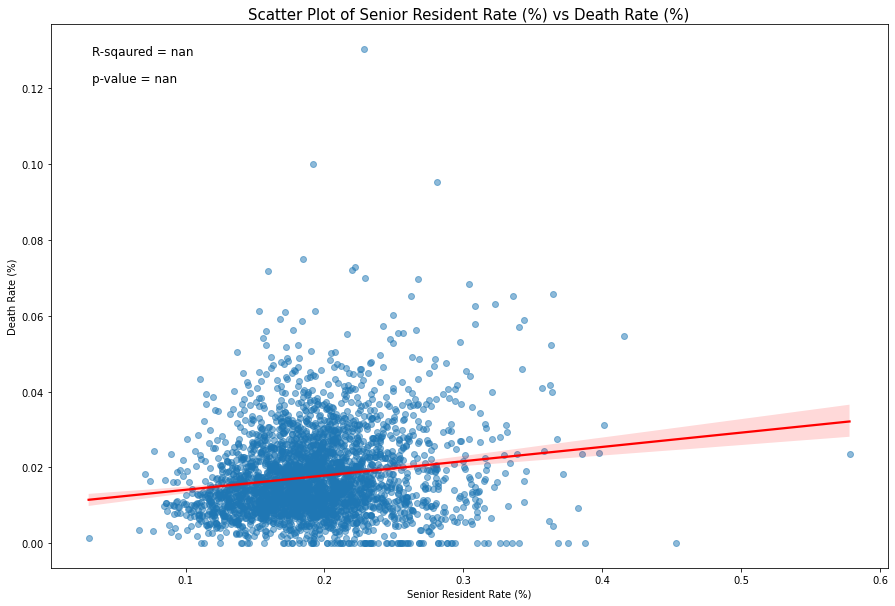



--------------- Done ---------------




In [34]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))

all_code = solution.execute_complete_program(code=all_code, try_cnt=10)